# EDA for textual data in Python
## Aswan Local Chapter Task 2

This notebook is meant to guide you in the task of EDA for textual data. 

The language used is Python, and I will be utilising a variety of libraries that I think are effective and straightforward for the EDA of textual data. 

For this task, we ask you to minimally perform the techniques outlined in this notebook. If you're experienced, feel free to use the libraries of your choice, and to perform any additional analysis.

### Beware

⚠️ The EDA will most likely highlight problems in the first pre-processing (as exemplified by this notebook). Please fix any mistakes.

⚠️ The code in this notebook can be slow because I used nested loops - I decided to deliberately avoid list comprehensions to make it more readable to beginners. If you're experienced, please *do* feel free to make the code more efficient!

## Choice of dataset

--- To perform this task, write Caterina Bonan a DM so she can share the integrated dataset with you ---

If you're *not* a confident programmer, feel free to do a smaller contribution and just work on one of the clean datasets from our repo.

Here, I shall demonstrate how to perform basic EDA using the pre-processed Slur Corpus.

In [2]:
# let us import the libraries that we will use in the task
# please make sure all libraries are installed in your local machine to be able to work on the file

import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [3]:
# let us open the file
# the file you want to open needs to be in the same folder as this notebook

dataset = pd.read_csv("slur-corpus-clean.csv")
dataset.sample(10)

,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
28241,slur-corpus,That's because Reddit is full of white knight ...,0,That s Reddit full white knight faggots,That s Reddit full white knight faggots
8835,slur-corpus,Imagine a nigger mailman,2,Imagine nigger mailman,Imagine nigger mailman
9911,slur-corpus,The fact is that she told the child to not tal...,0,The fact told child talk color skin If simply...,The fact told child talk color skin If simply...
31129,slur-corpus,"I just googled his net worth, he apparently is...",0,I googled net worth apparently If I worth ...,I googled net worth apparently If I worth ...
15493,slur-corpus,He actually looks like a balding manlet faggot...,1,He actually looks like balding manlet faggot l...,He actually looks like balding manlet faggot l...
11775,slur-corpus,What is this faggot tree?,0,What faggot tree,What faggot tree
20485,slur-corpus,Imagine iPhone 8 is released in a very scarce ...,2,Imagine iPhone released scarce limited editio...,Imagine iPhone released scarce limited editio...
19402,slur-corpus,Lmao we're not your friends faggot,0,Lmao re friends faggot,Lmao re friends faggot
16707,slur-corpus,Lol nigger nadoo manages to form a coherent se...,2,Lol nigger nadoo manages form coherent sentence,Lol nigger nadoo manages form coherent sentence
1803,slur-corpus,That's the joke you nigger,2,That s joke nigger,That s joke nigger


In [4]:
# this code can be used to check the shape of the corpus you're working on

dataset.shape

(37810, 5)

The dataset has 5 columns (as expected) and 37810 rows.

## Text statistics

Text statistics visualisations can give us previous insights on our datasets. These include the analysis of word frequenvy, sentence length, average word lengt etc.

Please know that we're able to move to these techniques straight away because we have already pre-processed the datasets we want to work on. If we were working on raw datasets, we would have to pre-process them before moving to text analysis.

Important: Our pre-processed text for EDA is stored in the `clean_sentece_EDA` column. Make sure you work on the right sentences!

###  Sentence length histogram

Histograms diplay insights on continuous data. Here, we will use them to gain insights on the length of our sentences.

We will first look at the number of characters in the sentences, and then number of words.

<AxesSubplot: >

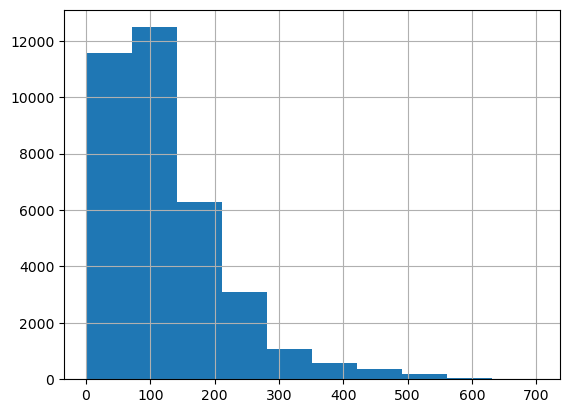

In [5]:
# cheching the number of characters in the sentences
# the colums we are extracting sentences from is assigned here and throughout to the variable 'data'

data = dataset['clean_sentence_EDA']
data.str.len().hist()

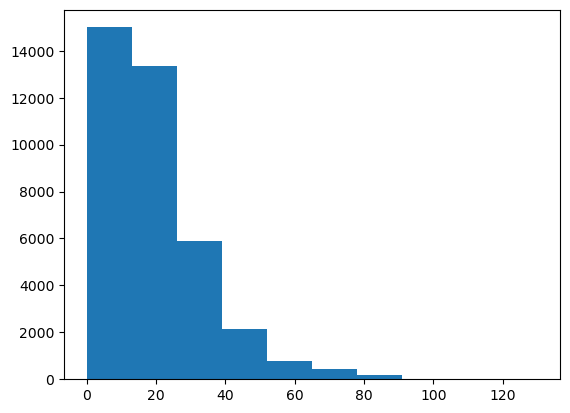

In [6]:
# count words to gain insights

counts = []

for sentence in dataset['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    word_count = len(sentence)
    counts.append(word_count)

plt.hist(counts)
plt.show()

In [7]:
# basic metrics

total_num_words = sum(counts) # total number of words
average_sentence_length = np.mean(counts) # print everage sentence length

word_lengths = []
for sentence in dataset['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    for word in sentence:
        length = len(word)
        word_lengths.append(length)

average_word_length = np.mean(word_lengths) # print everage word length

print(f'Total number of words in the dataset: {total_num_words} words.')
print(f'Average length of words in the dataset: {average_word_length} characters.')
print(f'Average length of sentences in the dataset: {average_sentence_length} words.')

Total number of words in the dataset: 720539 words.
Average length of words in the dataset: 5.03907213905146 characters.
Average length of sentences in the dataset: 19.056836815657235 words.


The histograms and metrics above show that most sentences in the corpus are about 80-130 character or 10-20 word long. The total number of words in the dataset is 720539. The average length of words is 5 characters.

### Most frequent words

In [8]:
all_words = []

for sentence in dataset['clean_sentence_EDA']:
    words = word_tokenize(str(sentence))
    for word in words:
        all_words.append(word)

print(all_words[:100])

['Fuck', 'I', 'dont', 'wan', 'na', 'watch', 'tranny', 'porn', 'Opie', 'wanted', 'good', 'time', 'The', 'old', 'rant', 'Africans', 'Ant', 'old', 'joke', 'tranny', 'cock', 'Jim', 'Opie', 'admitted', 'accepted', 'place', 'show', 'It', 'two', 'queens', '’', 'keep', 'together', 'Opie', '✊', 'Fuck', 'faggot', 'Fallon', 'Fucking', 'sissy', 'boy', 'acting', 'like', 'year', 'old', 'playing', 'slumber', 'party', 'games', 'Put', 'Norm', 'amp', 'Louis', 'tour', 'together', 'See', 'much', 'fucking', 'money', 'make', 'together', 'BbBB', 'bb', 'bbb', 'OP', 's', 'faggot', 'Who', 'even', 'uses', 'word', 'tranny', 'except', 'transphobes', 'lol', 'I', 'm', 'happy', 'anyone', 'wants', 'faggot', 'boipussy', '💓', 'sub', 'big', 'rboottoobig', 'bigger', 'But', 'admin', 'running', 'page', 'nigger', 'Yeah', 'real', 'sports', 'like', 'nigger', 'rugby', 'vertical', 'nigger']


⚠️ Note that this corpus has a problem: it contains emojis in the sentences for EDA, which is against our pre-processing guidelines. Please solve this problems in the files you work on before proceeding further.

In [9]:
# let us find the 20 most common words now

most_common = Counter(all_words).most_common(20)
print(most_common)

[('I', 28180), ('s', 12391), ('nt', 12042), ('faggot', 10960), ('nigger', 10842), ('tranny', 8575), ('people', 7258), ('like', 7214), ('word', 4092), ('re', 3909), ('It', 3832), ('m', 3809), ('would', 3663), ('say', 3457), ('get', 3379), ('’', 3335), ('You', 3310), ('black', 3217), ('one', 3059), ('The', 2940)]


<AxesSubplot: >

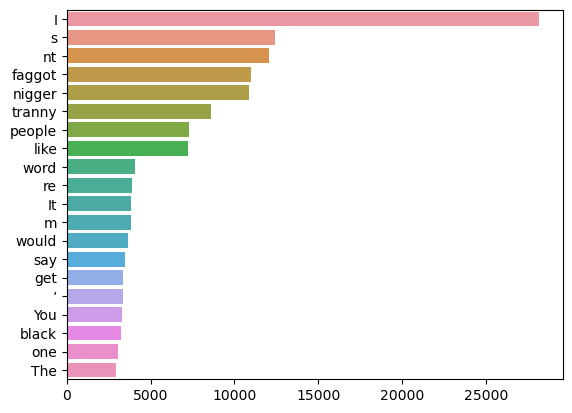

In [10]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

⚠️ The graph above shows that we should lowercase our dataset and get rid of all contractions. 

In what follows, I do an additional round of cleaning of the sentences under investigation and replot the chart.

In [23]:
all_words_clean = []

for sentence in dataset['clean_sentence_EDA']:
    words = word_tokenize(str(sentence))
    for word in words:
        word = word.lower() # lowercase all word
        if len(word) >= 3: # quick solution to get rif of contractions
            # find better solution in official version
            all_words_clean.append(word)

print(all_words_clean[:100])

['fuck', 'dont', 'wan', 'watch', 'tranny', 'porn', 'opie', 'wanted', 'good', 'time', 'the', 'old', 'rant', 'africans', 'ant', 'old', 'joke', 'tranny', 'cock', 'jim', 'opie', 'admitted', 'accepted', 'place', 'show', 'two', 'queens', 'keep', 'together', 'opie', 'fuck', 'faggot', 'fallon', 'fucking', 'sissy', 'boy', 'acting', 'like', 'year', 'old', 'playing', 'slumber', 'party', 'games', 'put', 'norm', 'amp', 'louis', 'tour', 'together', 'see', 'much', 'fucking', 'money', 'make', 'together', 'bbbb', 'bbb', 'faggot', 'who', 'even', 'uses', 'word', 'tranny', 'except', 'transphobes', 'lol', 'happy', 'anyone', 'wants', 'faggot', 'boipussy', 'sub', 'big', 'rboottoobig', 'bigger', 'but', 'admin', 'running', 'page', 'nigger', 'yeah', 'real', 'sports', 'like', 'nigger', 'rugby', 'vertical', 'nigger', 'soccer', 'faggot', 'looks', 'awesome', 'that', 'like', 'saying', 'word', 'belong', 'hispanics', 'the']


In [12]:
# let us find the 20 most common words now (after second round of pre-processing)

most_common2 = Counter(all_words_clean).most_common(20)
print(most_common2)

[('nigger', 12534), ('faggot', 11698), ('tranny', 9315), ('people', 7669), ('like', 7632), ('word', 4127), ('would', 3798), ('you', 3748), ('get', 3655), ('say', 3541), ('black', 3467), ('one', 3346), ('the', 3196), ('think', 2954), ('fucking', 2917), ('know', 2676), ('fuck', 2653), ('shit', 2609), ('called', 2514), ('call', 2507)]


<AxesSubplot: >

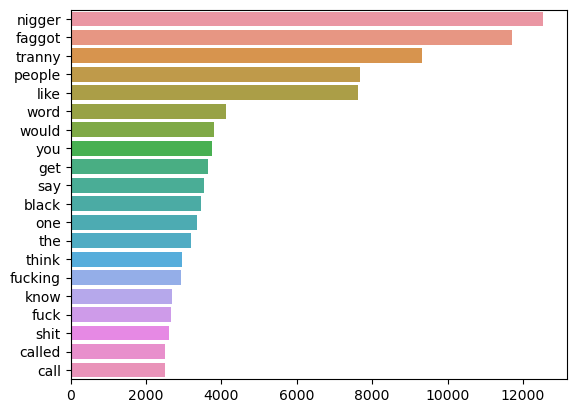

In [13]:
# word frequency after second round of pre-processing

words, frequency = [], []
for word, count in most_common2:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

### Label balance

In [14]:
risky = 0
potentially_risky = 0
non_risky = 0
void = 0
other = 0

for label in str(dataset['label']):
    if label == '1':
        potentially_risky += 1
    elif label == '2':
        risky += 1
    elif label == '0':
        non_risky += 1
    elif label == "":
        void += 1
    else:
        other += 1

print(risky)
print(potentially_risky)
print(non_risky)
print(other)
print(void)

7
2
11
141
0


⚠️ There is a problem with the label count. This must be fixed in the dataset.

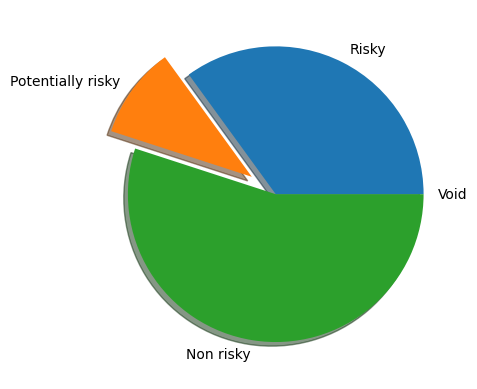

In [15]:
# plot a pie chart to show label proportions

y = np.array([risky, potentially_risky, non_risky, void])
custom_labels = ["Risky", "Potentially risky", "Non risky", "Void"]
myexplode = [0, 0.2, 0, 0] # not compulsory (use for interesting value, i.e, most or least represented)

plt.pie(y, labels = custom_labels, explode = myexplode, shadow = True)
plt.show() 

The pie chart shows us the proportions between labels. Please remember that the proportions displayed above are faulty as a problem with the labeling has been detected!

## Cloud

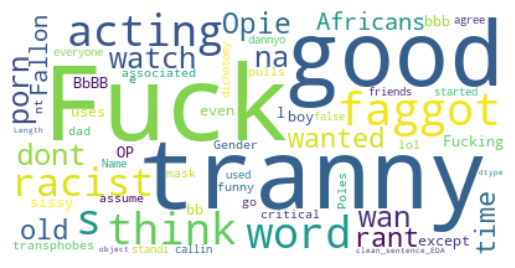

In [22]:
# create a word cloud
# make sure the dataset is nice and clean before generating this

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(dataset['clean_sentence_EDA']))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## References

To prepare these guidelines, I used the following sources:
- https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
- https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
- https://towardsdatascience.com/fundamental-eda-techniques-for-nlp-f81a93696a75

# 